# Ανάλυση Δεδομένων - Εφαρμογή στην Αστροφυσική

## 1. Ανάλυση του εξωπλανήτη  *51 Peg b*

### Θεωρητικό υπόβαθρο

Σε αυτό το πρόβλημα, θα εξετάσουμε ένα σύνολο δεδομένων που περιέχει την *ακτινική ταχύτητα* ενός αστέρα για διάφορα χρονικά σημεία. Η ακτινική ταχύτητα είναι η ταχύτητα με την οποία ένας αστέρας πλησιάζει ή απομακρύνεται από εμάς (θετικές τιμές ταχύτητας υποδηλώνουν ότι ο αστέρας απομακρύνεται από εμάς).


Εάν ένας αστέρας δεν είναι κοντά σε κάποιο άλλο αντικειμένο, τότε δεν υπάρχει κάποιος λόγος η ακτινική ταχύτητα του αστέρα να αλλάζει με τον χρόνο. Στη περίπτωση, όμως, όπου ένα δεύτερο αντικείμενο βρίσκεται σε τροχιά γύρω από τον αστέρα (π.χ. ένας πλανήτης ή ένας συνοδός αστέρας), τότε τόσο ο αστέρας όσο και το αντικείμενο θα βρίσκονται σε τροχιά γύρω από το κέντρο μάζας του διπλού συστήματος. Έτσι, η ακτινική ταχύτητα του αστέρα θα παρουσιάζει διακυμάνσεις με την πάροδο του χρόνου. Αυτές οι αλλαγές στην ταχύτητα προκαλούν μία μετατόπιση στις φασματικές γραμμές, λόγω του φαινομένου Doppler, την οποία μπορούμε να μετρήσουμε με επίγεια τηλεσκόπια τα οποία είναι εξοπλισμένα με φασματογράφους. Τέτοιες φασματοσκοπικές αναλύσεις γίνονται για παράδειγμα στο αστεροσκοπείο του Σκίνακα.

Όσο πιο μικρό είναι το δεύτερο αντικείμενο, τόσο μικρότερη είναι η επίδρασή του στον αστέρα. Για παράδειγμα, η ταχύτητα του Ήλιου επηρεάζεται από την παρουσία της Γης κατά 0.1 m/s σε περίοδο ενός χρόνου.


Μπορείτε να δείτε το παρακάτω video ώστε να πάρετε μια ιδέα του πως η παρουσία ενός μεγάλου πλανήτη σε τροχιά γύρω από το άστρο του επηρεάζει τις παρατηρούμενες φασματικές γραμμές του αστέρα:

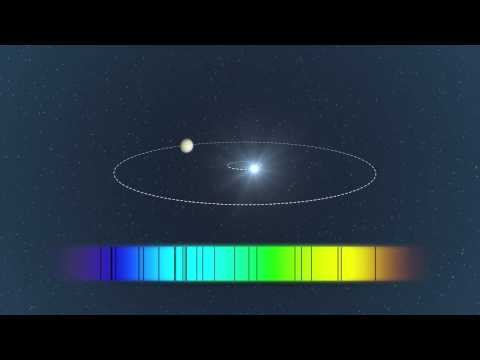

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("-BuwWtMygxU")

Για τους λόγους που αναλύθηκαν παραπάνω, η μέτρηση της ακτινικής ταχύτητας των αστέρων με πολύ μεγάλη ακρίβεια μπορεί να χρησιμοποιηθεί για την ανίχνευση πλανητών. Σε αυτό το σημείο πρέπει να αναφέρουμε ότι η μέτρηση της ταχύτητας των εξωπλανητών δεν είναι καθόλου εύκολη υπόθεση καθώς είναι πολύ πιο αμυδρά αντικείμενα από τους αστέρες.

Σε αυτό το πρόβλημα, θέλουμε να εξετάσουμε εάν ένας συγκεκριμένος αστέρας έχει κάποιο συνοδό αντικείμενο. Αν ναι, τότε θέλουμε να εκτιμήσουμε την μάζα του και να αποφανθούμε αν αυτό το αντικείμενο είναι πλανήτης ή κάτι άλλο. Το σύνολο δεδομένων για αυτή την άσκηση είναι το ``UID_0113357_RVC_001.tbl``. Τα δεδομένα πάρθηκαν από το [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/overview/51%20Peg%20b#planet_51-Peg-b_collapsible). Η πρώτη στήλη είναι ο χρόνος (σε ημέρες), η δεύτερη στήλη είναι η ακτινική ταχύτητα (σε m/s) και η τρίτη στήλη είναι η αβεβαιότητα στην ακτινική ταχύτητα (σε m/s). Μπορείτε να αγνοήσετε την τέταρτη στήλη.

### 1.1 Εκτίμηση της ακτινικής ταχύτητας του αστέρα

Για αρχή, θέλουμε να δούμε αν ο αστέρας παρουσιάζει όντως περιοδικές μεταβολές, και αν ναι, θέλουμε να μετρήσουμε την περίοδο και το πλάτος τους. Το πλάτος είναι μία άμεση μέτρηση της ακτινικής ταχύτητας.


Διαβάστε τα δεδομένα και κάντε ένα γράφημα της ακτινικής ταχύτητας που υπάρχει στο αρχείο των δεδομένων. Σιγουρευτείτε ότι το γράφημα συνοδεύεται από κατάλληλα ονόματα για τους άξονες, μονάδες μέτρησης και error bars!


Όπως θα δείτε, οι παρατηρήσεις δεν πάρθηκαν με την ίδια χρονική απόσταση η μία με την άλλη, οπότε δεν είναι εύκολο να διακρίνουμε κάποια περιοδική μεταβολή στην καμπύλη με μια απλή οπτική εξέταση. Γι' αυτό το λόγο θα χρησιμοποιήσουμε μία αυτοματοποιημένη μέθοδο. Ο καλύτερος τρόπος για να βρούμε την περίοδο μιας χρονοσειράς όπως αυτή είναι να χρησιμοποιήσουμε ένα **περιοδόγραμμα**. Ένας τέτοιος αλγόριθμος που δουλεύει καλά στη περίπτωσή μας είναι ο ακόλουθος:

- Διαλέξτε μία τιμή για την ``περίοδο``.


- Υπολογίστε τη φάση της καμπύλης της ακτινικής ταχύτητας:
    
        phase = (time % period) / period
        
        
- Ταξινομείστε τη φάση και την ταχύτητα σύμφωνα με τη φάση.


- Βρείτε το μήκος της γραμμής που ενώνει όλα τα σημεία, από αριστερά προς τα δεξιά. Αν γράψουμε την ταξινομημένη φάση ως $\phi$, την ταχύτητα ως $v$, και τον αριθμό των σημείων ως $N$, τότε αυτό το μήκος είναι: $$\sum_{i}^{N-1} \sqrt{\left(\phi_{i+1} - \phi_i \right)^2 + \left(v_{i+1} - v_i \right)^2}$$


- Επαναλάβετε για διάφορες τιμές της περιόδου και βρείτε το ελάχιστο μήκος και σε ποιά περίοδο αντιστοιχεί.


**Υλοποιήστε τον παραπάνω αλγόριθμο** προσπαθώντας να βρείτε το μήκος της γραμμής για 10,000 περιόδους οι οποίες είναι κατανεμημένες λογαριθμικά μεταξύ 1 και 100 ημέρες. Προσοχή, ο υπολογισμός του μήκους της γραμμής δεν πρέπει να γίνεται με κάποιο βρόγχο καθώς ο κώδικας θα είναι πολύ αργός. Μπορείτε όμως να χρησιμοποιήσετε κάποιον βρόγχο για τις περιόδους.

Υπόδειξη: εάν θέλετε να ταξινομήσετε κάποιο array ``y`` σύμφωνα με τις τιμές ενός array ``x``, μπορείτε να χρησιμοποιήσετε τη μέθοδο ``numpy.argsort``:

       y_new = y[np.argsort(x)]
       
       
       
**Φτιάξτε ένα log-log διάγραμμα** του μήκους της γραμμής ως συνάρτηση της περιόδου και περιγράψτε το γράφημα. Θα πρέπει να είστε σε θέση να διακρίνετε κάποια ελάχιστα. Βρείτε την περίοδο του πρώτου καθαρού ελαχίστου.


**Φτιάξτε ένα διάγραμμα** της ακτινικής ταχύτητας (με error bars) ως συνάρτηση της φάσης της περιόδου που βρήκατε παραπάνω. Εάν η ανάλυσή σας είναι σωστή, θα πρέπει να δείτε κάτι που μοιάζει με μία περίοδο της συνάρτησης του ημιτόνου. Αυτό σημαίνει ότι υπάρχουν όντως περιοδικές (και μάλιστα ημιτονοειδής) μεταβολές στην καμπύλη της ακτινική ταχύτητας, κάτι που υποδηλώνει ότι μάλλον υπάρχει και κάποιο άλλο αντικείμενο σε τροχιά γύρω από τον αστέρα! 
       
       
**Προσαρμόστε μία συνάρτηση** της μορφής: $$f(x) = a \sin(2\pi x + b)$$

στο διάγραμμα της ακτινικής ταχύτητας - φάσης και **φτιάξτε ένα γράφημα** όπου φαίνεται το αρχικό διάγραμμα μαζί με την προσαρμοσμένη καμπύλη.

Η παράμετρος $a$ θα σας δώσει το πλάτος της καμπύλης της ακτινικής ταχύτητας (εάν σας δίνει αρνητική τιμή, μετατρέψτε την σε θετική για το επόμενο κομμάτι). **Βρείτε την αβεβαιότητα** στη παράμετρο $a$ κάνοντας χρήση του πίνακα συνδιακύμανσης (covariance matrix) που επιστρέφεται από τη συνάρτηση προσαρμογής.

Αν ακολουθήσατε όλα τα βήματα και κάνατε σωστή ανάλυση, θα πρέπει να έχετε στη διάθεσή σας την περίοδο και το πλάτος (μαζί με την αβεβαιότητα) της καμπύλης της ακτινικής ταχύτητας!

---

In [2]:
# Import all necessary modules beforehand
%matplotlib inline

import numpy as np
import scipy.optimize as so

import sympy as s
from sympy.abc import sigma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoLocator, AutoMinorLocator)


# This is to stop any annoying warning to pop-up
import warnings
warnings.filterwarnings('ignore')

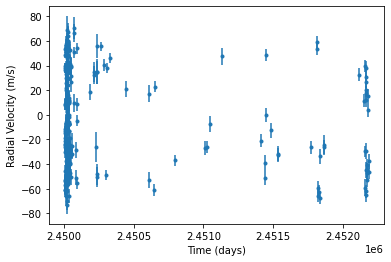

In [3]:
# Read the data from file
data = np.genfromtxt("data/UID_0113357_RVC_001.tbl")

# Define axes
time = data[:,0]
rad_velocity = data[:,1]

# errorbar expects array of shape 2xN and not Nx2 (N = len(x)) for xerr and yerr
# Use the .T method to get the transpose of the matrix
yerror= data[:, 2].T


# Plot radial velocity vs time
plt.xlabel("Time (days)")
plt.ylabel("Radial Velocity (m/s)")

_ = plt.errorbar(time, rad_velocity, yerr=yerror, fmt=".")

In [4]:
def path_length(phi,v):
    """
        RETURN:
        ========
            - The length of a line that would join all the points (float).
            
        ARGS:
        ========
            - phi : sorted list containing phase values.
            - v : sorted list containing velocity values
    """
    return sum(
        ((phi_i1 - phi_i)**2 + (v_i1 - v_i)**2)**.5 
        for (phi_i, phi_i1, v_i, v_i1) in zip(phi[1:], phi[:-1], v[1:], v[:-1]))

Minimum length: 2141.106648514847 which corresponds to a period of: 8.462384403903696
The actual period that corresponds to the first minimum is: 4.231192201951848


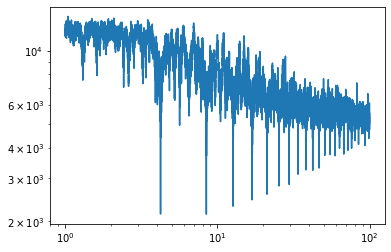

In [5]:
line_lengths=[] # A list that contains the string length for each period
periods = [] # A list that contains 10,000 periods

# In logarithmic space: log10(1 day) = 0 and log10(100 days) = 2
for period in np.logspace(0, 2, num=10_000):

    # Define the phase
    phase = (time % period) / period
    periods.append(period)

    # Sort phase and velocity by this phase
    phase_sorted = phase[np.argsort(phase)]
    velocity_sorted = rad_velocity[np.argsort(phase)]
    
    # Do the same for the errors
    errors_sorted = yerror[np.argsort(phase)]
    
    line_lengths.append(path_length(phase_sorted, velocity_sorted))

    
# Convert the lists into arrays
periods_array = np.asarray(periods)
line_lengths_array = np.asarray(line_lengths)

# Find the minimum length
print('Minimum length: {} which corresponds to a period of: {}'.format(min(line_lengths_array),
                                                                periods_array[np.argmin(line_lengths_array)]))




# Plot a log-log diagram of the line length versus the period
plt.xscale("log")
plt.yscale("log")
_ = plt.plot(periods_array, line_lengths_array)

# NOTE: This period corresponds to the second minimum! Thus,
# for the first minimum the period will be ~ 4.23 days

orbital_period = periods_array[np.argmin(line_lengths_array)] / 2.0

print("The actual period that corresponds to the first minimum is:", orbital_period)

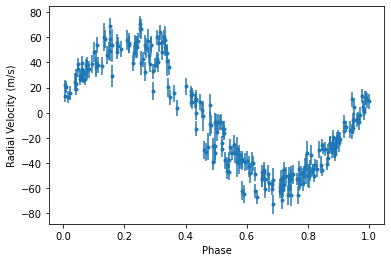

In [6]:
# Re-evaluate and re-sort the phase and velocity for the period we found above

final_phase = (time % (periods_array[np.argmin(line_lengths_array)] / 2.0)) / \
                    (periods_array[np.argmin(line_lengths_array)] / 2.0)

final_phase_sorted = final_phase[np.argsort(final_phase)]

final_velocity_sorted = rad_velocity[np.argsort(final_phase)]

# Do the same for the errors
final_errors_sorted = yerror[np.argsort(final_phase)]


# Plot radial velocity (with error bars) versus phase 
plt.xlabel("Phase")
plt.ylabel("Radial Velocity (m/s)")
_ = plt.errorbar(final_phase_sorted, final_velocity_sorted, yerr = yerror, fmt=".")

Για να κατασκευάσουμε πιο ποιοτικά γραφήματα, θα φτιάξουμε μία συνάρτηση η οποία όταν καλείται θα αλλάζει διάφορες προκαθορισμένες παραμέτρους της βιβλιοθήκης ``matplotlib``. Αυτό φυσικά δεν αποτελεί κάποιο απαραίτητο στάδιο και μπορείτε να αλλάζετε τις παραμέτρους των διαγραμμάτων όπως εσεις το επιθυμείτε κάθε φορα που κάνετε κάποιο γράφημα. Αυτό όμως αποτελεί μία καλή πρακτική όταν θέλετε να κατασκευάσετε γραφήματα που έχουν οπτικά μία κοινή αισθητική.

Μπορείτε να πειραματιστείτε με τη χρήση αυτής της συνάρτησης εάν το επιθυμείτε, ώστε να καταλάβετε πως επηρεάζει τα γραφήματα. Για να μπορέσουμε να επαναφέρουμε τις παραμέτρους της βιβλιοθήκης ``matplotlib`` στις προκαθορισμένες τους τιμές, θα τις αποθηκεύσουμε σε ένα λεξικό, και θα κατασκευάσουμε μία ακόμα συνάρτηση που, όταν καλείται, να μας γυρίζει στις αρχικές αυτές ρυθμίσεις.

In [7]:
# Store original plot parameters so that we can revert:
ORIG_MATPLOTLIB_CONF = dict(matplotlib.rcParams)

def make_canvas(fig_width=None, fig_height=None, columns=1, fontsize=8, clear=False):
    """
        It creates the basic canvas for a plot.
        
        ARGS:
        ========
            - fig_width: the width of the figure. If None then it is determined by the number of columns
            - fig_height: the height of the figure. If None then it is determined based on the golden_ratio
            - columns: the number of columns in the page. Can be 1 or 2.
            - fontsize: the fontsize for labels, title, legend etc.
            - clear: If True it clears any figure created before the call of the function. Can be useful
                when the function is called within a loop.
    """
    
    assert(columns in [1,2])

    if fig_width is None:
        if columns == 1:
            fig_width = 14.0
        else:
            fig_width = 7.0

    if fig_height is None:
        golden_ratio = (np.sqrt(5.0) - 1.0) / 2.0    
        fig_height = fig_width * golden_ratio 


    params = {
        'font.family': 'sans-serif',
        'font.sans-serif' : ['Times New Roman'],
        'font.size' : fontsize,
        "figure.figsize":[fig_width, fig_height],
        'axes.labelsize' : fontsize,
        'axes.titlesize' : fontsize,
        'xtick.labelsize' : fontsize,
        'ytick.labelsize' : fontsize,
        'legend.fontsize' : fontsize,
        'axes.linewidth' : 2,
        'lines.linewidth' : 1.0,
        'savefig.dpi' : 300
    }
    plt.rcParams.update(params)
    
    fig, ax = plt.subplots()
    ax.tick_params(direction='in', which='major', axis='both', length=8, width=1, top=True, right=True)
    ax.tick_params(direction='in', which='minor', axis='both', length=4, width=1, top=True, right=True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
        
    if clear:
        plt.clf()
        
        
        
def revert_params(ORIG_MATPLOTLIB_CONF=ORIG_MATPLOTLIB_CONF):
    """
    Reverts any changes done to matplotlib parameters and restores
    the state before make_canvas was called
    """

    matplotlib.rcParams.update(ORIG_MATPLOTLIB_CONF)

a = 55.683409 +/- 0.519746
b = -12.286781 +/- 0.009296


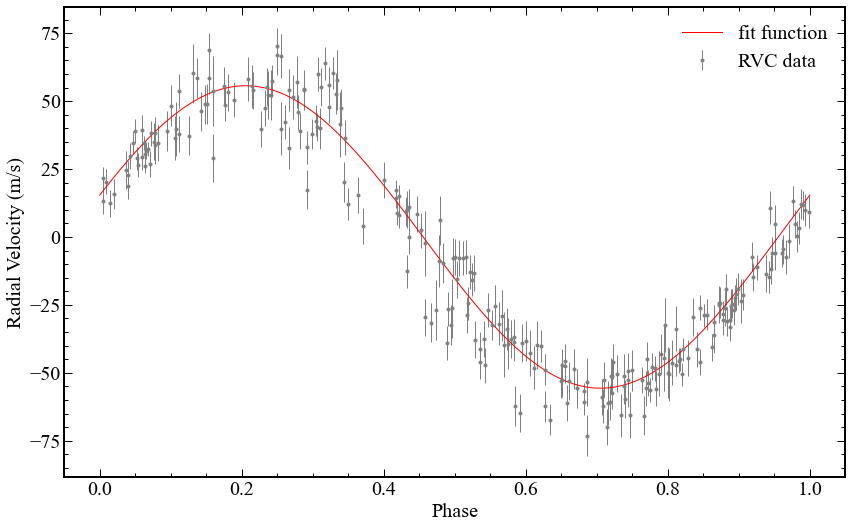

In [8]:
def sinusoidal_fit_fn(x, a, b):
    """
    Fitting function. This applies for one period!
    If you want to fit two peaks then change the
    frequency to 4*np.pi etc.
    """
    return a * np.sin(2 * np.pi * x + b)

# Fit the data and get the covariace matrix
popt, pcov = so.curve_fit(sinusoidal_fit_fn, final_phase_sorted, final_velocity_sorted,
                        sigma = final_errors_sorted, absolute_sigma = True)



# print(popt, pcov)
print("a = %f +/- %f" % (popt[0], np.sqrt(pcov[0][0])))
print("b = %f +/- %f" % (popt[1], np.sqrt(pcov[1][1])))

x_fit = np.linspace(0.0, 1.0, 100)
y_fit = sinusoidal_fit_fn(x_fit, *(popt))

# Making the plot easier to the eye
make_canvas(columns=1, fontsize=20)

plt.xlabel("Phase")
plt.ylabel("Radial Velocity (m/s)")

# Plot data with errorbars
_ = plt.errorbar(final_phase_sorted, final_velocity_sorted, yerr = yerror, fmt=".", color="grey", label='RVC data')

# over-plot fit curve
_ = plt.plot(x_fit, y_fit, 'red', label='fit function')
_ = plt.legend(loc='upper right', frameon=False)

# plt.savefig('velovity_vs_phase.pdf', dpi=300, bbox_inches='tight')

Άρα: $$v_{\rm rad} = (55.68 \pm 0.51) \sin(2\pi \phi - (12.286 \pm 0.009))$$

---

### 1.2 Εκτίμηση της μάζας του εξωπλανήτη *51 Peg b*

Στο προηγούμενο μέρος βρήκαμε ότι η καμπύλη της ακτινικής ταχύτητας του άστρου 51 Pegasi μπορεί να προσεγγιστεί από μία ημιτονοειδής καμπύλη, κάτι που υποδηλώνει ότι υπάρχει ένα αόρατο αντικείμενο σε κυκλική τροχιά γύρω από το άστρο. Σε αυτό το μέρος, θα προσπαθήσουμε να εκτιμήσουμε τη μάζα του αόρατου αυτού συνοδού. 

Για δύο σώματα (στη περίπτωσή μας ένας αστέρας και ένα άγνωστο αντικείμενο) που βρίσκονται σε τροχιά γύρω από το κέντρο μάζας του συστήματος, ο 3ος νόμος του Kepler γράφεται: 
$$\frac{4\pi^2}{T^2} = \frac{GM_{\star}(1+q)}{R^3}$$

όπου $T$ είναι η τροχιακή περίοδος, $M_{\star}$ η μάζα του αστέρα, $q$ είναι ο λόγος της μάζας του αντικειμένου προς τη μάζα του αστέρα και $R$ η απόσταση μεταξύ του αντικειμένου και του αστέρα.

Επιπρόσθετα, για δύο αντικείμενα σε τροχιά γύρω από το κέντρο μάζας, τα πλάτη των ταχυτήτων, $K$, θα σχετίζονται με τη μάζα των δύο αντικειμένων (όπου το πιο μαζικό κινείται λιγότερο): $$\frac{K_\star}{K_{\rm object}} = q$$

Ακόμα, για μία κυκλική τροχιά ισχύει: $$K_{\rm object} T = 2\pi R$$

Αντικαθιστώντας τα παραπάνω στην έκφραση για τον 3ο νόμο του Kepler, προκύπτει: 
$$(1+q)q^3 = \frac{T K_\star^3}{2\pi G M_\star}$$

Τέλος, υπάρχει ακόμα ένα βασικό σημείο που πρέπει να προσέξουμε. Αυτό είναι ότι το πλάτος της ταχύτητας που μετράμε για τον αστέρα δεν είναι $K_\star$, αλλά 

$$K_{\rm \star, obs} = K_\star\, \sin i$$

όπου $i$ είναι η γωνία θέασης του συστήματος. Γωνία $i=90^\circ$ σημαίνει ότι βλέπουμε το σύστημα edge-on ενώ $i=0^\circ$ σημαίνει ότι βλέπουμε το σύστημα face-on και άρα ο αστέρας δεν φαίνεται να κινείται σε σχέση με εμάς (δηλαδή ούτε πλησιάζει ούτε απομακρύνεται). Το $K_{\rm \star, obs}$ είναι το πλάτος της ταχύτητας - δηλαδή η παράμετρος $a$ που υπολογίσατε στο προηγούμενο μέρος.

Έτσι, αν υποθέσουμε ότι $q \ll 1$, η τελική εξίσωση είναι:

$$q \approx \left( \frac{T}{2 \pi G M_\star} \right)^{1/3} \frac{K_{\rm \star, obs}}{\sin i}$$


**Υπολογίστε την τιμή του $q$** υιοθετώντας τις τιμές των $T$, $K_{\rm \star, obs}$ που βρήκατε στην ενότητα 1.1 και υποθέτοντας ότι $\sin i = 1$ και $M_\star$ είναι ίση με τη μάζα του Ήλιου ($M_\star = 1.989 \times 10^{30}$ kg). Χρησιμοποιώντας την τιμή του $q$, βρείτε τη μάζα του αντικειμένου σε μονάδες μάζες Δία ($M_{\rm Jupiter} = 1.898 \times 10^{27}$ kg). Μπορεί αυτό το αντικείμενο να είναι πλανήτης;

In [9]:
# Declare some useful constants 
# (This would be a GREAT time to familiriaze yourself with the astropy module instead of doing this)
G = 6.674 * 10 ** (-11) # In SI units
M_star = 1.989 * 10 ** (30) # In Kilograms
M_jupiter = 1.898 * 10 ** (27) # In Kilograms


def kepler(M, T = 365472, k = 55.68, i = 90 * np.pi / 180) :
    """
    The inclination angle is provided in degrees and converted
    to radians. The period T has been converted to seconds in
    order for all parameters to comply with SI units.
    """
    global G
    q = ((T / (2 * np.pi * G * M)) ** (1/3)) * (k / np.sin(i))
    return q

# Find the mass ratio
q = kepler(M_star)
print("The mass ratio of the two bodies is:", q)

# Find the mass in kilograms
M_obj_kilo = q * M_star # In kilograms
print("The mass of the companion is:", M_obj_kilo, "Kilograms")

# Find the mass in units of Jupiter masses
M_obj_jup = M_obj_kilo / M_jupiter
print("or", M_obj_jup, "times the mass of Jupiter")

# The object is likely a small planet orbiting a Sun-like star
# with an orbiting period of approximately 4.2 days!

The mass ratio of the two bodies is: 0.00042291229569867573
The mass of the companion is: 8.411725561446662e+26 Kilograms
or 0.4431889126157356 times the mass of Jupiter


---

### 1.3 Προσομείωση Monte-Carlo (BONUS)

Στη πραγματικότητα, οι μετρήσεις σας του $K_{\rm \star, obs}$ έχουν κάποια αβεβαιότητα, η μάζα του αστέρα έχει επίσης κάποιο σφάλμα και η γωνία θέασης, επίσης, είναι αβέβαιη. Προσπαθείστε να εκτελέσετε μία προσομείωση Monte-Carlo για να υπολογίσετε τη πιθανή κατανομή της μάζας για το αντικείμενο υποθέτοντας:

- Το σφάλμα στην ακτινική ταχύτητα είναι αυτό που υπολογίσατε στην ενότητα 1.1 και είναι κανονικό σφάλμα (δηλαδή η κατανομή του ακολουθεί τη Γκαουσιανή κατανομή).


- Η μάζα του αστεριού λαμβάνεται από μια ομοιόμορφη κατανομή μεταξύ 0.6 και 1.4 φορές τη μάζα του Ήλιου.


- Η γωνία θέασης, $i$, μπορεί να έχει οποιαδήποτε τιμή μεταξύ 0 και 90 μοίρες. Όμως, δεν μπορούμε απλά να κάνουμε τυχαία δειγματολειψία για τιμές μεταξύ 0 και 90 καθώς κάποιες γωνίες θέασης είναι πιο πιθανές από άλλες. Για να γίνει σωστά πρέπει να κάνετε μία ομοιόμορφη δειγματοληψία για το $\cos i$ μεταξύ 0 και 1 και στη συνέχεια να βρείτε το $i$ ή το $\sin i$ από αυτό.


Από αυτή τη προσομείωση Monte-Carlo, **φτιάξτε ένα διάγραμμα** για τη πιθανότητα αυτό το αντικείμενο να έχει μία συγκεκριμένη μάζα και περιορίστε το στο διάστημα 0 μέχρι 13 φορές τη μάζα του Δία.

**Ποιά είναι η (αριθμητική) πιθανότητα** το αντικείμενο αυτό να έχει λιγότερη μάζα από 13 φορές τη μάζα του Δία (αυτό είναι συνήθως το όριο μάζας για έναν πλανήτη); Χρησιμοποιώντας την ορολογία 1/2/3/4/5-σιγμα (δείτε [εδω](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) για λεπτομέρειες), πόσο σίγουροι είστε ότι αυτό το αντικείμενο είναι πλανήτης;

#### <center> Gaussian distribution for Radial Velocity

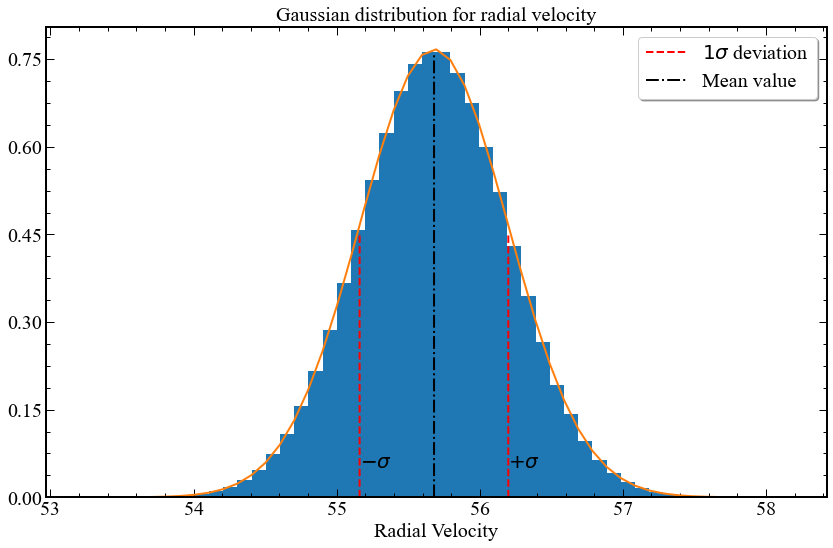

In [10]:
n = 1000000
mean_rad_velocity = 55.68
sigma_rad_velocity = 0.52

# Sample radial velocity
radial_velocity_sample = np.random.normal(mean_rad_velocity, sigma_rad_velocity, n)
    
make_canvas(fontsize=20)
# Plot histogram and fitting curve    
count, bins, ignored = plt.hist(radial_velocity_sample, 50, density=True)
plt.plot(bins, 1/(sigma_rad_velocity * np.sqrt(2 * np.pi)) *
        np.exp(- (bins - mean_rad_velocity)**2 / (2 * sigma_rad_velocity ** 2)), lw=2.0)


# Axis label
plt.xlabel("Radial Velocity")

# Visualize one sigma deviation
minus_one_sigma = np.ones(n) * (mean_rad_velocity - np.std(radial_velocity_sample, ddof = 1))
plus_one_sigma = np.ones(n) * (mean_rad_velocity + np.std(radial_velocity_sample, ddof = 1))
y = np.linspace(0, 0.45, n)
plt.plot(minus_one_sigma, y, "--", color = "red", lw=2.0, label = r"$1\sigma$ deviation")
plt.plot(plus_one_sigma, y, '--', lw=2.0, color = "red")

# Visualize mean value
mean_value = np.ones(n) * np.mean(radial_velocity_sample) 
y2 = np.linspace(0, 0.76, n)
plt.plot(mean_value, y2, "-.", lw=2.0, color = "black", label = "Mean value")

# Legend and text
legend = plt.legend(loc = "upper right", shadow = True)
_ = plt.text(minus_one_sigma[0], y[1]+0.05, r"$-\sigma$")
_ = plt.text(plus_one_sigma[0], y[1]+0.05, r"$+\sigma$")
_ = plt.title("Gaussian distribution for radial velocity")

#### <center> Uniform distribution for the Mass of the star

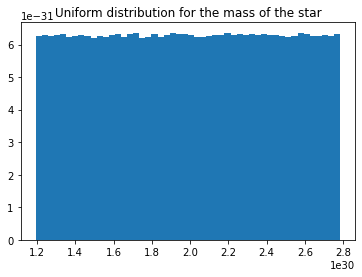

In [11]:
# Sample of masses in solar mass units
mass_sample = np.random.uniform((0.6 * M_star), (1.4 * M_star), n)

# Plot histogram
revert_params()
_ = count, bins, ignored = plt.hist(mass_sample, 50,  density=True)
_ = plt.title("Uniform distribution for the mass of the star")

#### <center> Distribution for $\sin i$

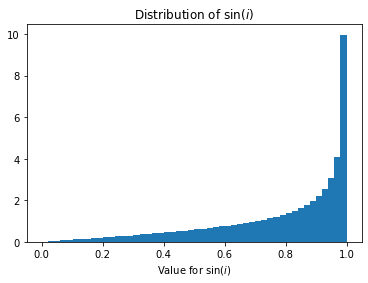

In [12]:
# Sample for cosine
cos_sample = np.random.uniform(0,1, n)

# The uniform distribution for cosine:
#count, bins, ignored = plt.hist(cos_sample, 50, normed = True)

# Sample for sine
# Here we're using the basic trigonometric identity
# sin(x)^2 + cos(x)^2 = 1
sin_sample = np.sqrt(1 - cos_sample ** 2)

# Plot histogram
count, bins, ignored = plt.hist(sin_sample, 50, density=True)
plt.xlabel(r"Value for $\sin(i)$")
_ = plt.title(r"Distribution of $\sin(i)$")

#### <center> Histogram of the probability the object to have a certain mass

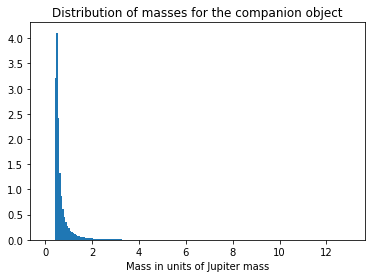

In [13]:
# Use the previous non-gaussian distributions/samples to 
# simulate the q-ratio
final_q =  ((365472 / (2 * np.pi * G * mass_sample)) ** (1/3)) * (radial_velocity_sample / sin_sample)

# Convert the x-axis to reflect the mass of the
# object in units of Jupiter mass
M_obj_in_jup_unit = (final_q * M_star) / M_jupiter

# Plot the histogram constraining the x-axis to 0-13 times Jupiter's mass
# make_canvas(fontsize=20)
count, bins, ignored = plt.hist(M_obj_in_jup_unit, 200, range = (0.0, 13.0), density=True)
plt.xlabel("Mass in units of Jupiter mass")
_ = plt.title("Distribution of masses for the companion object")

#### <center> Calculation of the probability that the object is less massive than 13 times the mass of Jupiter

In [14]:
# Create a mask (boolean array) for the masses that are
# above the maximum mass of a planet
mask_for_non_planet = M_obj_in_jup_unit > 13.0

# Check how many values (out of one million) exceed
# the maximum limit
more_than_13_mass = M_obj_in_jup_unit[mask_for_non_planet]
#print(len(more_than_13_mass))

# Calculate the probability a value would exceed this
# limit
prob_no_planet = (len(more_than_13_mass) / n) * 100
prob_planet = 100 - prob_no_planet

# Print final results
print("The probability of the object to be a planet is", str(round(prob_planet, 4)) + "%")
print("This corresponds to an approximate 3.4" + str(s.pretty(sigma)), "confidence level")

final_remarks = """
Based on the final results, we can be 99.9% positive that the orbiting object is a planet.
The mass of the planet is difficult to be constrained due to uncertainties, 
but the most probable scenario is that it has a mass around 0.44 times the mass of Jupiter.
"""

print(final_remarks)

The probability of the object to be a planet is 99.9354%
This corresponds to an approximate 3.4σ confidence level

Based on the final results, we can be 99.9% positive that the orbiting object is a planet.
The mass of the planet is difficult to be constrained due to uncertainties, 
but the most probable scenario is that it has a mass around 0.44 times the mass of Jupiter.

